<a href="https://colab.research.google.com/github/kumar2612/ai_ml/blob/ai_ml_basics_nov2024/langgraph_tutorials/6_Summarize_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade --quiet tiktoken langchain langgraph beautifulsoup4 langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.2/411.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.4 MB/s eta 0:00:00


In [2]:
from google.colab import userdata
import os

os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_ENDPOINT"]="https://api.smith.langchain.com"
os.environ["LANGCHAIN_API_KEY"]=userdata.get('LANGCHAIN_API_KEY')
os.environ["LANGCHAIN_PROJECT"]="langchain_tutorials"

In [13]:
from langchain_community.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://lilianweng.github.io/posts/2023-06-23-agent/")
docs = loader.load()

In [4]:
!pip install -qU langchain-groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 kB 4.3 MB/s eta 0:00:00


In [21]:
os.environ["GROQ_API_KEY"] = userdata.get('GROQ_API_KEY')

from langchain_groq import ChatGroq

llm = ChatGroq(model="llama3-8b-8192")

In [6]:
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain.chains.llm import LLMChain
from langchain_core.prompts import ChatPromptTemplate

# Define prompt
prompt = ChatPromptTemplate.from_messages(
    [("system", "Write a concise summary of the following using bullet points:\\n\\n{context}")]
)

# Instantiate chain
chain = create_stuff_documents_chain(llm, prompt)
docs[0].page_content = docs[0].page_content[:5000]
#docs
# Invoke chain
result = chain.invoke({"context": docs})
print(result)

Here is a concise summary of LLM Powered Autonomous Agents using bullet points:

**Overview of LLM-Powered Autonomous Agents:**
* LLM (Large Language Model) serves as the core controller of the agent system
* Complemented by key components: Planning, Memory, and Tool Use

**Component One: Planning**
* Task decomposition: breaking down large tasks into smaller subgoals
* Self-reflection: allowing the agent to learn from mistakes and refine past actions
* Techniques: Chain of Thought (CoT), Tree of Thoughts, LLM+P (using an external classical planner)

**Component Two: Memory**
* Short-term memory: utilizing in-context learning (Prompt Engineering)
* Long-term memory: retaining and recalling information over extended periods using external vector stores and fast retrieval

**Component Three: Tool Use**
* Learning to call external APIs for extra information
* Accessing current information, code execution, and proprietary information sources

**Key Concepts and Techniques:**
* Chain of Tho

In [7]:
for token in chain.stream({"context": docs}):
    print(token, end="|")

|Here| is| a| concise| summary| of| the| article| using| bullet| points|:

|**|LL|M| Powered| Autonomous| Agents| Overview|**
|*| A| L|LM|-powered| autonomous| agent| system| uses| a| large| language| model| (|LL|M|)| as| its| core| controller|,| complement|ed| by| key| components|:| planning|,| memory|,| and| tool| use|.
|*| The| potential| of| L|LM| extends| beyond| generating| text| to| being| a| powerful| general| problem| solver|.

|**|Component| One|:| Planning|**
|*| Task| decomposition|:| breaking| down| large| tasks| into| smaller|,| manageable| sub|goals|.
|*| Techniques| for| task| decomposition|:| Chain| of| Thought| (|Co|T|),| Tree| of| Thoughts|,| and| L|LM|+|P|.
|*| Self|-ref|lection|:| allowing| the| agent| to| refine| past| action| decisions| and| correct| previous| mistakes|.

|**|Component| Two|:| Memory|**
|*| Short|-term| memory|:| utilizing| in|-context| learning| to| learn| from| the| current| input|.
|*| Long|-term| memory|:| retaining| and| recalling| informati

In [8]:
from langchain_core.prompts import ChatPromptTemplate

map_prompt = ChatPromptTemplate.from_messages(
    [("system", "Write a concise summary of the following:\\n\\n{context}")]
)

In [9]:
map_prompt.invoke({"context":"this is a text document"})

ChatPromptValue(messages=[SystemMessage(content='Write a concise summary of the following:\\n\\nthis is a text document', additional_kwargs={}, response_metadata={})])

In [10]:
from langchain import hub

map_prompt = hub.pull("rlm/map-prompt")

In [11]:
# Also available via the hub: `hub.pull("rlm/reduce-prompt")`
reduce_template = """
The following is a set of summaries:
{docs}
Take these and distill it into a final, consolidated summary
of the main themes.
"""

reduce_prompt = ChatPromptTemplate([("human", reduce_template)])

In [14]:
from langchain_text_splitters import CharacterTextSplitter

text_splitter = CharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=1000, chunk_overlap=0
)
split_docs = text_splitter.split_documents(docs)
print(f"Generated {len(split_docs)} documents.")

Generated 14 documents.


In [15]:
import operator
from typing import Annotated, List, Literal, TypedDict

from langchain.chains.combine_documents.reduce import (
    acollapse_docs,
    split_list_of_docs,
)
from langchain_core.documents import Document
from langgraph.constants import Send
from langgraph.graph import END, START, StateGraph

token_max = 1000


def length_function(documents: List[Document]) -> int:
    """Get number of tokens for input contents."""
    return sum(llm.get_num_tokens(doc.page_content) for doc in documents)


# This will be the overall state of the main graph.
# It will contain the input document contents, corresponding
# summaries, and a final summary.
class OverallState(TypedDict):
    # Notice here we use the operator.add
    # This is because we want combine all the summaries we generate
    # from individual nodes back into one list - this is essentially
    # the "reduce" part
    contents: List[str]
    summaries: Annotated[list, operator.add]
    collapsed_summaries: List[Document]
    final_summary: str


# This will be the state of the node that we will "map" all
# documents to in order to generate summaries
class SummaryState(TypedDict):
    content: str


# Here we generate a summary, given a document
async def generate_summary(state: SummaryState):
    prompt = map_prompt.invoke(state["content"])
    response = await llm.ainvoke(prompt)
    return {"summaries": [response.content]}


# Here we define the logic to map out over the documents
# We will use this an edge in the graph
def map_summaries(state: OverallState):
    # We will return a list of `Send` objects
    # Each `Send` object consists of the name of a node in the graph
    # as well as the state to send to that node
    return [
        Send("generate_summary", {"content": content}) for content in state["contents"]
    ]


def collect_summaries(state: OverallState):
    return {
        "collapsed_summaries": [Document(summary) for summary in state["summaries"]]
    }


async def _reduce(input: dict) -> str:
    prompt = reduce_prompt.invoke(input)
    response = await llm.ainvoke(prompt)
    return response.content


# Add node to collapse summaries
async def collapse_summaries(state: OverallState):
    doc_lists = split_list_of_docs(
        state["collapsed_summaries"], length_function, token_max
    )
    results = []
    for doc_list in doc_lists:
        results.append(await acollapse_docs(doc_list, _reduce))

    return {"collapsed_summaries": results}


# This represents a conditional edge in the graph that determines
# if we should collapse the summaries or not
def should_collapse(
    state: OverallState,
) -> Literal["collapse_summaries", "generate_final_summary"]:
    num_tokens = length_function(state["collapsed_summaries"])
    if num_tokens > token_max:
        return "collapse_summaries"
    else:
        return "generate_final_summary"


# Here we will generate the final summary
async def generate_final_summary(state: OverallState):
    response = await _reduce(state["collapsed_summaries"])
    return {"final_summary": response}


# Construct the graph
# Nodes:
graph = StateGraph(OverallState)
graph.add_node("generate_summary", generate_summary)  # same as before
graph.add_node("collect_summaries", collect_summaries)
graph.add_node("collapse_summaries", collapse_summaries)
graph.add_node("generate_final_summary", generate_final_summary)

# Edges:
graph.add_conditional_edges(START, map_summaries, ["generate_summary"])
graph.add_edge("generate_summary", "collect_summaries")
graph.add_conditional_edges("collect_summaries", should_collapse)
graph.add_conditional_edges("collapse_summaries", should_collapse)
graph.add_edge("generate_final_summary", END)

app = graph.compile()

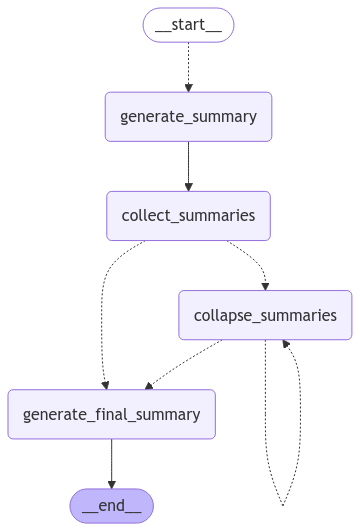

In [16]:
from IPython.display import Image

Image(app.get_graph().draw_mermaid_png())

In [22]:
async for step in app.astream(
    {"contents": [doc.page_content for doc in split_docs]},
    {"recursion_limit": 10},
):
    print(list(step.keys()))

['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['collect_summaries']
['collapse_summaries']
['collapse_summaries']
['generate_final_summary']


In [23]:
print(step)

{'generate_final_summary': {'final_summary': 'Here is the consolidated summary of the main themes:\n\nAfter analyzing the summaries, the main themes that emerge are:\n\n1. **Autonomous Agents and Language Models**: The development and integration of autonomous agents powered by Large Language Models (LLMs) to solve complex problems, with a focus on planning, memory, and tool use.\n2. **Task Decomposition and Planning**: Techniques for breaking down complex tasks into smaller, manageable steps, including Chain of Thought, Tree of Thoughts, and planning and reasoning strategies like LLM+P and ReAct.\n3. **Self-Improvement and Reflection**: The importance of self-reflection in autonomous agents, allowing them to improve iteratively by refining past action decisions and correcting previous mistakes, discussed in the context of ReAct and Reflexion frameworks.\n4. **Learning and Memory**: The concept of memory, including its types (sensory, short-term, and long-term), and its role in learnin